In [1]:

# Paper 3  Sarcasm detection
#  Rahul Panwar 20BCS171
#  Adarsh Kumar 20BCS016
# Mam in this paper implementation we have used the different dataset for the detection and have used all the algorithms and have also compared them 
import numpy as np 
import pandas as pd 


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_json("/content/drive/MyDrive/Sarcasm_Headlines_Dataset.json",lines=True)

In [6]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [8]:
df.dtypes

article_link    object
headline        object
is_sarcastic     int64
dtype: object

In [9]:
df.shape 

(26709, 3)

In [10]:
df.is_sarcastic.unique() 

array([0, 1])

In [11]:
df.describe() #

,is_sarcastic
count,26709.000000
mean,0.438953
std,0.496269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [12]:
df.is_sarcastic.value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [13]:
df['source'] = df.article_link.apply(lambda x: x.split('.')[1])
df = df.drop('article_link', axis=1)
df.shape

(26709, 3)

In [14]:
df.head()

,headline,is_sarcastic,source
0,former versace store clerk sues over secret 'b...,0,huffingtonpost
1,the 'roseanne' revival catches up to our thorn...,0,huffingtonpost
2,mom starting to fear son's web series closest ...,1,theonion
3,"boehner just wants wife to listen, not come up...",1,theonion
4,j.k. rowling wishes snape happy birthday in th...,0,huffingtonpost


In [15]:
df.source.unique()

array(['huffingtonpost', 'theonion'], dtype=object)

In [16]:
df.source.value_counts()

huffingtonpost    14985
theonion          11724
Name: source, dtype: int64

In [17]:
all_words = df['headline'].str.split(expand=True).unstack().value_counts()

In [18]:
all=pd.DataFrame(all_words).reset_index()

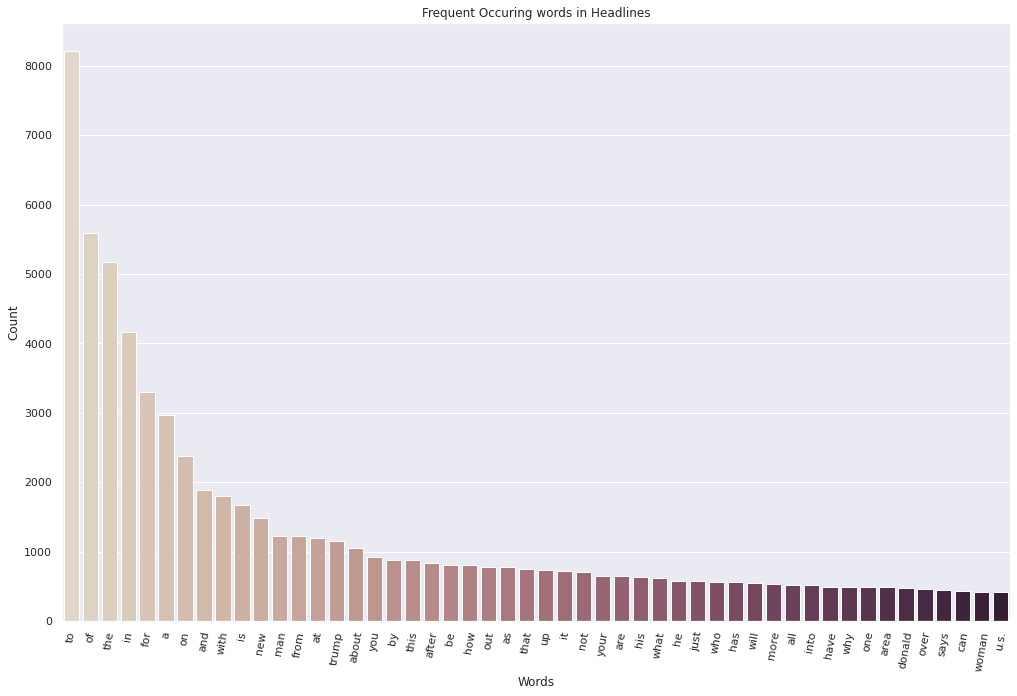

In [19]:
sns.set(rc={'figure.figsize':(17,11)})
sns.barplot(x=all['index'][0:50], y=all[0][0:50], data=all,palette="ch:.25")
plt.xlabel('Words')  
plt.ylabel('Count')  
plt.title("Frequent Occuring words in Headlines") 
plt.xticks(rotation=80);

In [21]:
non_sarc=pd.DataFrame(df[df['is_sarcastic']==0]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()

In [22]:
sarc=pd.DataFrame(df[df['is_sarcastic']==1]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()

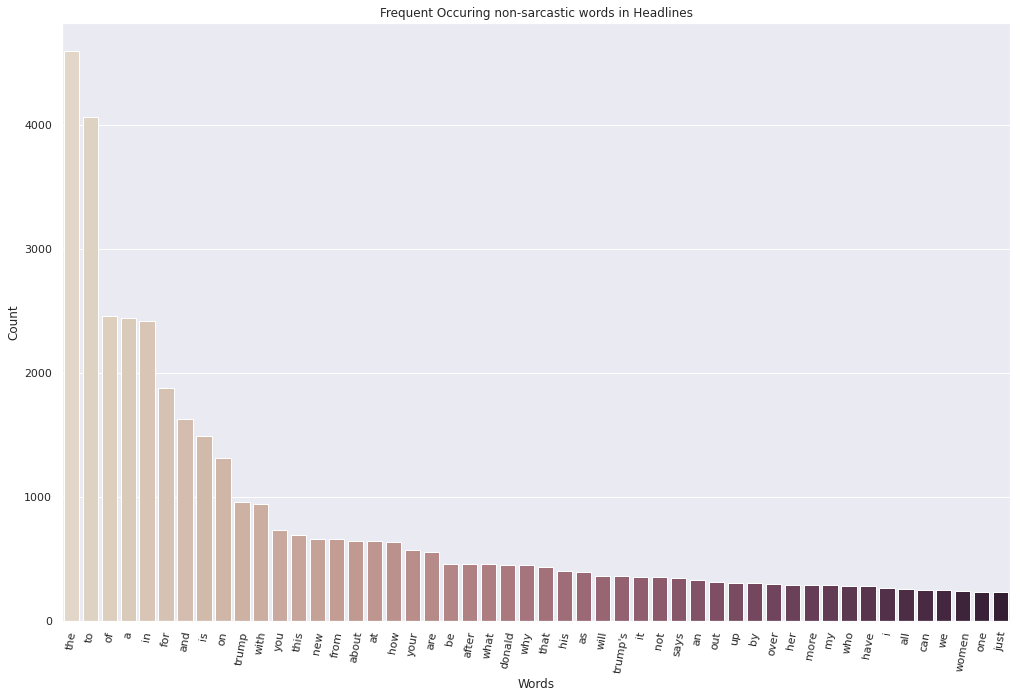

In [23]:
sns.set(rc={'figure.figsize':(17,11)})
sns.barplot(x=non_sarc['index'][0:50], y=non_sarc[0][0:50], data=non_sarc,palette="ch:.25")
plt.xlabel('Words')  # Add an x-label to the axes.
plt.ylabel('Count')  # Add a y-label to the axes.
plt.title("Frequent Occuring non-sarcastic words in Headlines") 
plt.xticks(rotation=80);

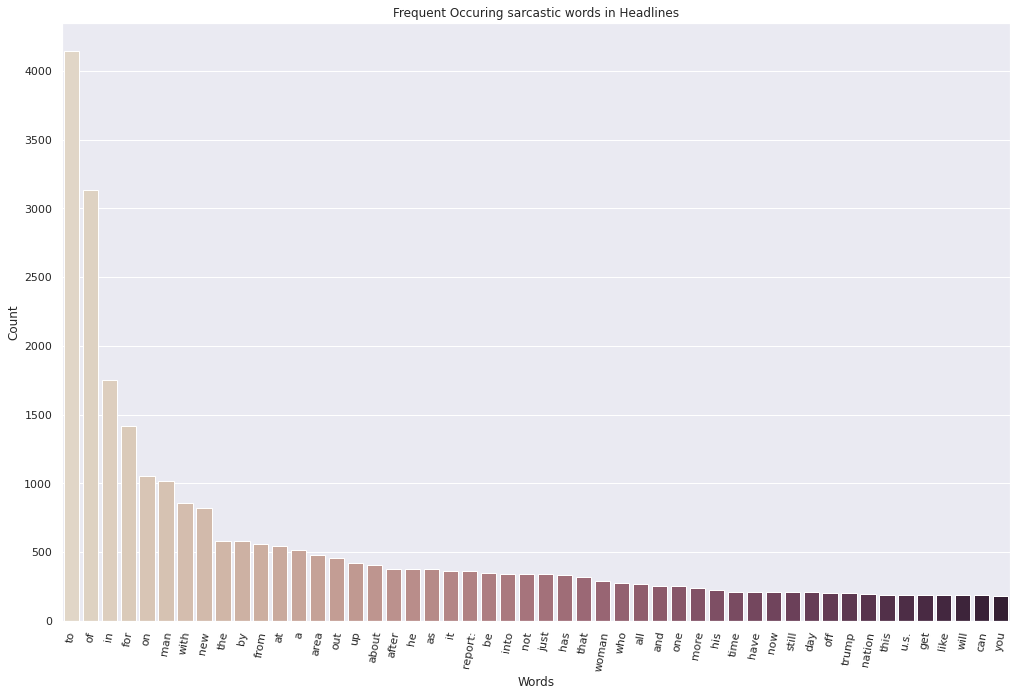

In [24]:
sns.set(rc={'figure.figsize':(17,11)})
sns.barplot(x=sarc['index'][0:50], y=sarc[0][0:50], data=sarc,palette="ch:.25")
plt.xlabel('Words')  # Add an x-label to the axes.
plt.ylabel('Count')  # Add a y-label to the axes.
plt.title("Frequent Occuring sarcastic words in Headlines") 
plt.xticks(rotation=80);

In [25]:
import nltk
nltk.download('stopwords')
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
from nltk.corpus import wordnet

In [28]:
sar_tokens = df[df['is_sarcastic'] == 1]['headline'].apply(lambda x: nltk.word_tokenize(x))  

In [29]:
nonsar_tokens = df[df['is_sarcastic'] == 0]['headline'].apply(lambda x: nltk.word_tokenize(x))   

In [30]:
stopwords = nltk.corpus.stopwords.words('english')

In [31]:
sarc2=[each_word.lower() for each_word in sarc['index']] 

In [32]:
sarc_nostop = [word for word in sarc2 if word not in stopwords]

In [33]:
non_sarc2=[each_word.lower() for each_word in non_sarc['index']]

In [34]:
non_sarc_nostop = [word for word in non_sarc2 if word not in stopwords]

In [35]:
from wordcloud import WordCloud, ImageColorGenerator

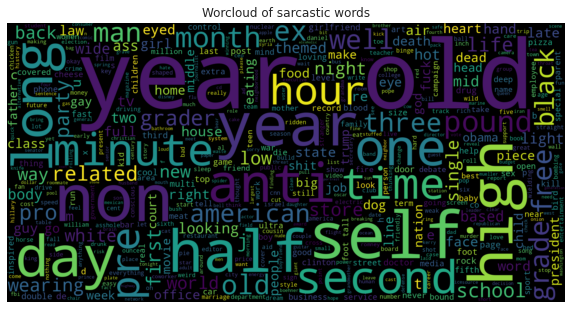

In [36]:
plt.figure(figsize = (10,10))
wc = WordCloud(width = 2000 , height = 1000 , max_words = 500).generate(' '.join(word for word in sarc_nostop))
plt.axis("off")
plt.title('Worcloud of sarcastic words')
plt.imshow(wc , interpolation = 'bilinear')

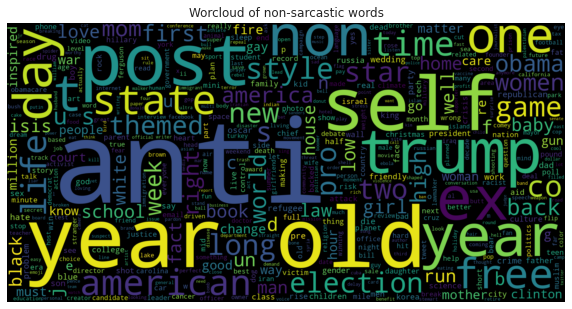

In [37]:
plt.figure(figsize = (10,10))
wc = WordCloud(width = 2000 , height = 1000 , max_words = 500).generate(' '.join(word for word in non_sarc_nostop))
plt.axis("off")
plt.title('Worcloud of non-sarcastic words')
plt.imshow(wc , interpolation = 'bilinear')

In [38]:
df['text_len'] = df['headline'].apply(lambda x: len(x.split(' ')))

In [39]:
df[df['text_len']>140]

,headline,is_sarcastic,source,text_len


In [40]:
df['headline'][7302]

'target pulls all sponsorship from publicly ignored syrian conflict'

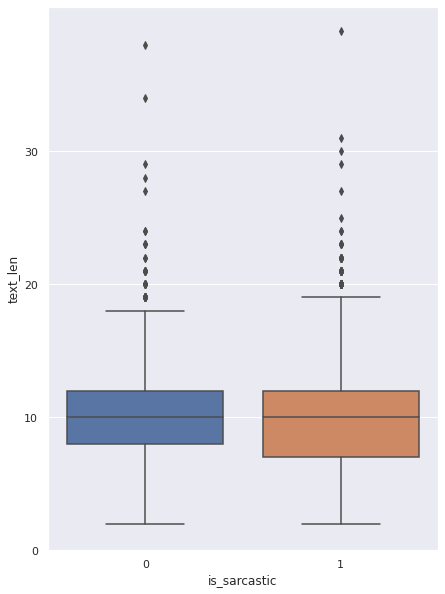

In [41]:
plt.figure(figsize = (7 ,10))
sns.boxplot(y='text_len', x="is_sarcastic", data=df)
y=df['text_len']
plt.yticks(np.arange(0, max(y), 10));

In [42]:
import re
def parser(x):
    x = re.sub('[^a-z\s]', '', x.lower())  #drop any symbol except a-z
    x = [w for w in x.split() if w not in set(stopwords)]
    x = [w for w in x if wordnet.synsets(w)]
    return ' '.join(x)

df['headline'] = df.headline.apply(lambda x: parser(x))

In [43]:
X = df['headline']
y = df.is_sarcastic

In [44]:
# 2. Split into Training and Test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cv = CountVectorizer(ngram_range=(1,3))
X_cv_train = cv.fit_transform(X_train)
X_cv_test = cv.transform(X_test)

### DecisionTreeClassifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_cv_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

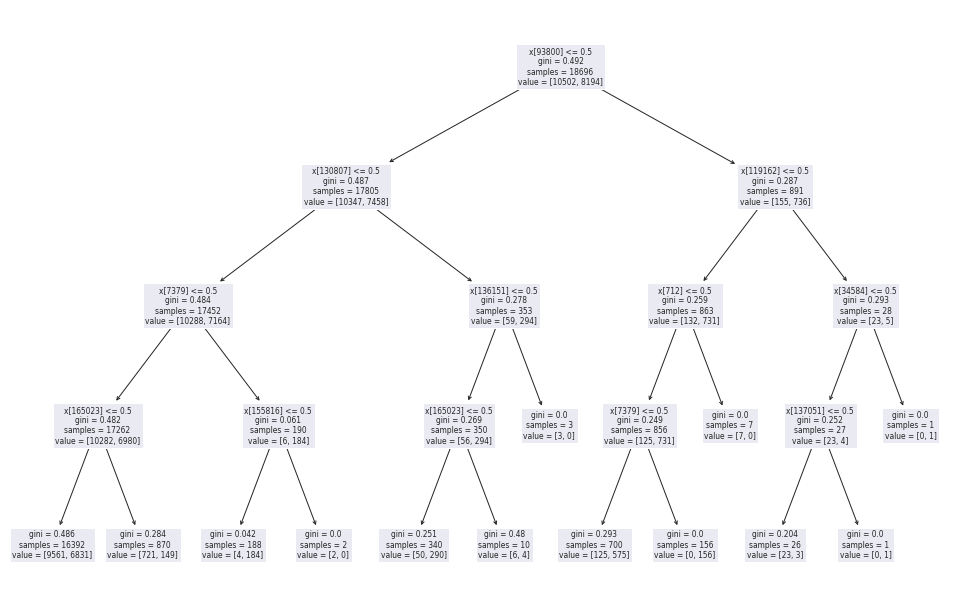

In [49]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.savefig('Decision.pdf')
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
y_pred = tree_model.predict(X_cv_test)
test = np.array(y_test)
predictions = np.array(y_pred)
confusion_matrix(test, predictions)

array([[4399,   84],
       [3051,  479]])

In [52]:
from sklearn.metrics import accuracy_score, f1_score

In [53]:
print('accuracy:', accuracy_score(y_test,y_pred))
print('f1-score:', f1_score(y_test,y_pred))

accuracy: 0.6087607637588918
f1-score: 0.23405814805765943


In [54]:
acc_tree = accuracy_score(y_test,y_pred)

### Logistic regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logreg = LogisticRegression()
logreg.fit(X_cv_train, y_train)

LogisticRegression()

In [57]:
logreg.score(X_cv_train, y_train)

0.9976465554129226

In [59]:
y_pred_logr = logreg.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_logr))
print('f1-score:', f1_score(y_test,y_pred_logr))

accuracy: 0.7863471858230375
f1-score: 0.7314088484468153


In [60]:
acc_logr = accuracy_score(y_test,y_pred_logr)

### SVM

In [61]:
from sklearn import svm

In [62]:
model = svm.SVC(kernel='linear', gamma=1) 
model.fit(X_cv_train, y_train)

SVC(gamma=1, kernel='linear')

In [63]:
model.score(X_cv_train, y_train)

0.9993046640992725

In [64]:
y_pred_svm= model.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_svm))
print('f1-score:', f1_score(y_test,y_pred_svm))

accuracy: 0.7726194933233496
f1-score: 0.7153125000000001


In [65]:
acc_svm = accuracy_score(y_test,y_pred_svm)

### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
forest = RandomForestClassifier (criterion='gini',
                                n_estimators=12, 
                                random_state=1)
forest.fit(X_cv_train, y_train)

RandomForestClassifier(n_estimators=12, random_state=1)

In [68]:
forest.score(X_cv_train, y_train)

0.9831514762516046

In [69]:
y_pred_forest= forest.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_forest))
print('f1-score:', f1_score(y_test,y_pred_forest))

accuracy: 0.7194558841881942
f1-score: 0.5984280100035727


In [70]:
acc_rf = accuracy_score(y_test,y_pred_forest)

### Naive Bayes

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [72]:
nb=MultinomialNB()
nb.fit(X_cv_train, y_train)

MultinomialNB()

In [73]:
nb.score(X_cv_train, y_train)

0.9954000855798032

In [74]:
y_pred_nb= nb.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_nb))
print('f1-score:', f1_score(y_test,y_pred_nb))

accuracy: 0.7964557593909897
f1-score: 0.7528413395969087


In [75]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      4483
           1       0.81      0.70      0.75      3530

    accuracy                           0.80      8013
   macro avg       0.80      0.79      0.79      8013
weighted avg       0.80      0.80      0.79      8013



In [76]:
acc_nb = accuracy_score(y_test,y_pred_nb)

### kNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_cv_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [79]:
y_pred_knn= knn.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_knn))
print('f1-score:', f1_score(y_test,y_pred_knn))

accuracy: 0.5721951828279046
f1-score: 0.14214214214214213


In [80]:
acc_knn = accuracy_score(y_test,y_pred_knn)

Comparison of all models' accuracy

In [81]:
models = ['DesicionTree','LogReg','SVM', 'RandomForest', 'NaiveBayes', 'kNN']
col = [acc_tree, acc_logr, acc_svm, acc_rf, acc_nb, acc_knn]
data = {'Models':models,'Accuracy':col}
graph_df = pd.DataFrame(data)
graph_df

,Models,Accuracy
0,DesicionTree,0.608761
1,LogReg,0.786347
2,SVM,0.772619
3,RandomForest,0.719456
4,NaiveBayes,0.796456
5,kNN,0.572195


In [82]:
graph_df = graph_df.sort_values(by=['Accuracy'], axis = 0, ascending=False)

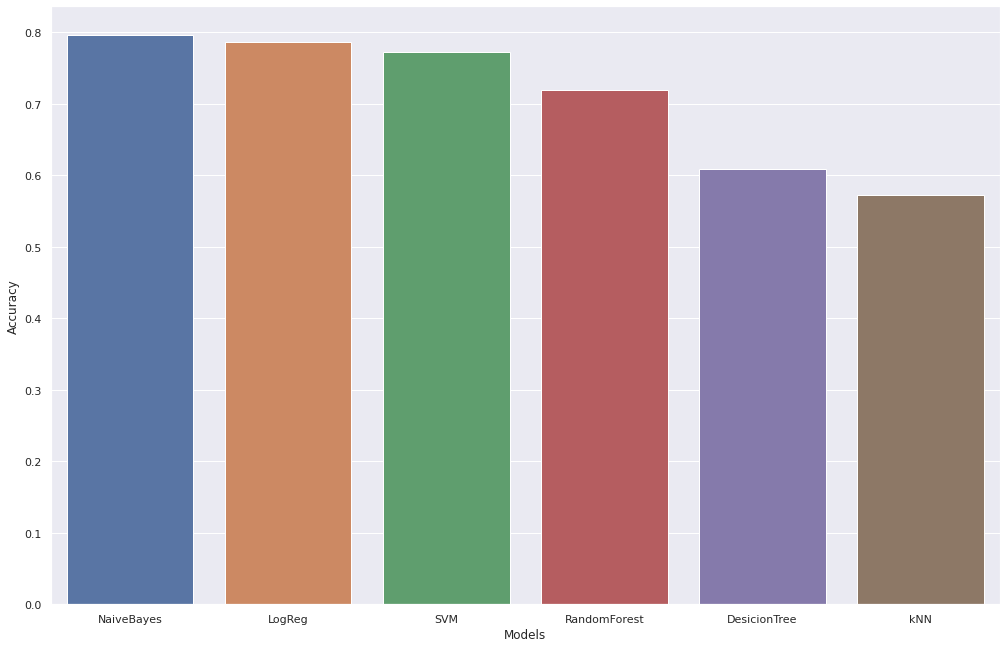

In [83]:
fig, ax = plt.subplots()
sns.barplot(x=graph_df['Models'], y=graph_df['Accuracy'], data=graph_df);